In [27]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [28]:
import numpy as np

In [29]:
import pandas as pd

path = "../data/processed/"

In [30]:
df_train = pd.read_csv(path + "train.csv")
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


In [31]:
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

In [32]:
df_test = pd.read_csv(path + "test.csv")
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,158,159,165,166,160,156,162,159,158,159,...,123,145,167,182,175,145,124,129,110,3
1,235,231,232,232,232,232,232,232,232,232,...,117,123,133,141,153,163,178,191,199,8
2,158,158,139,132,166,182,187,193,199,205,...,46,44,44,43,52,37,8,3,7,8
3,155,167,176,190,177,166,168,166,170,179,...,55,70,103,105,72,53,50,52,50,0
4,65,70,48,30,23,40,44,45,45,40,...,127,156,139,131,130,147,136,146,117,6


In [33]:
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

In [34]:
# Create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

ovr_clf = OneVsRestClassifier(dummy)

ovr_clf.fit(X_train, y_train)


ovr_predict = ovr_clf.predict(X_test)

In [35]:
print(classification_report(y_test, ovr_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.10      1.00      0.18      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/home/sprenger/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sprenger/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sprenger/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
conf_mat = confusion_matrix(y_test, ovr_predict)

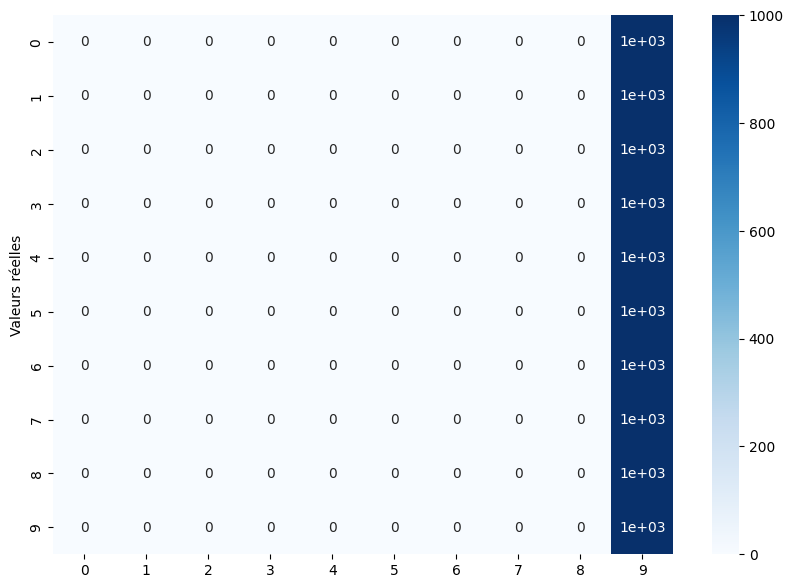

: 

In [38]:
plt.figure(figsize=(10,7))
plt.xlabel('Prédictions')
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.ylabel('Valeurs réelles')
plt.show()